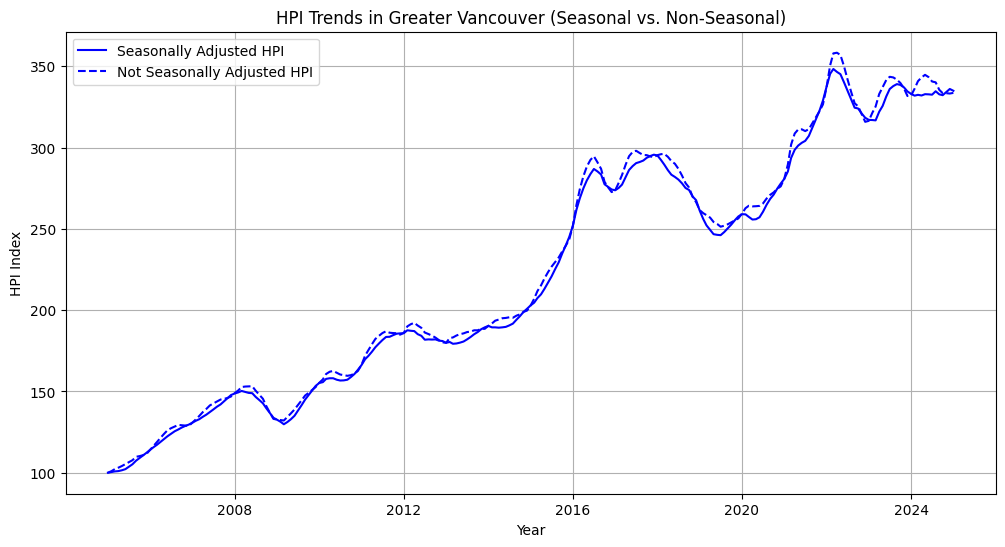

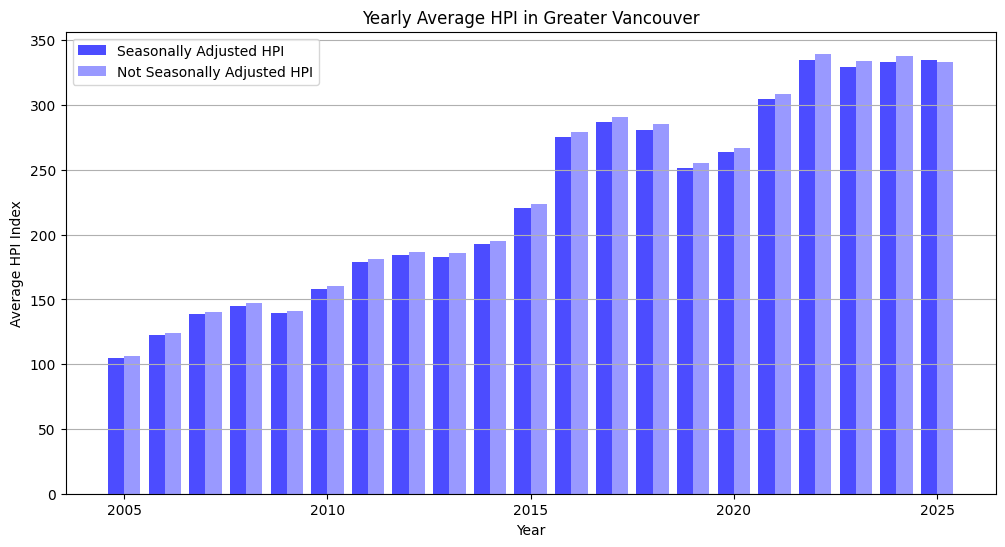

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_seasonally_adjusted = "../cleaned_data/cleaned_seasonality_adjust.csv"
file_not_seasonally_adjusted = "../cleaned_data/cleaned_not_seasonality_adjust.csv"

seasonally_adjusted_df = pd.read_csv(file_seasonally_adjusted)
not_seasonally_adjusted_df = pd.read_csv(file_not_seasonally_adjusted)

# Date transform to datetime type
seasonally_adjusted_df['Date'] = pd.to_datetime(seasonally_adjusted_df['Date'])
not_seasonally_adjusted_df['Date'] = pd.to_datetime(not_seasonally_adjusted_df['Date'])

# plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(seasonally_adjusted_df['Date'], seasonally_adjusted_df['Composite_HPI_SA'], label="Seasonally Adjusted HPI", linestyle="-", color="blue")
plt.plot(not_seasonally_adjusted_df['Date'], not_seasonally_adjusted_df['Composite_HPI'], label="Not Seasonally Adjusted HPI", linestyle="--", color="blue")

plt.title("HPI Trends in Greater Vancouver (Seasonal vs. Non-Seasonal)")
plt.xlabel("Year")
plt.ylabel("HPI Index")
plt.legend()
plt.grid(True)
plt.show() 

# avarage HPI each year
seasonally_adjusted_df["Year"] = seasonally_adjusted_df["Date"].dt.year
not_seasonally_adjusted_df["Year"] = not_seasonally_adjusted_df["Date"].dt.year

seasonal_avg = seasonally_adjusted_df.groupby("Year")["Composite_HPI_SA"].mean()
non_seasonal_avg = not_seasonally_adjusted_df.groupby("Year")["Composite_HPI"].mean()

# plot the bar chart
plt.figure(figsize=(12, 6))
width = 0.4
years = seasonal_avg.index

plt.bar(years - width/2, seasonal_avg, width=width, label="Seasonally Adjusted HPI", color="blue", alpha=0.7)
plt.bar(years + width/2, non_seasonal_avg, width=width, label="Not Seasonally Adjusted HPI", color="blue", alpha=0.4)

plt.title("Yearly Average HPI in Greater Vancouver")
plt.xlabel("Year")
plt.ylabel("Average HPI Index")
plt.legend()
plt.grid(axis="y")
plt.show()
